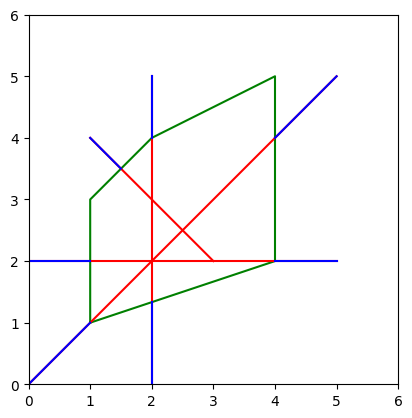

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def cyrus_beck(p1, p2, clip_polygon):
    """
    Cyrus-Beck line clipping algorithm
    :param p1: First endpoint of the line segment
    :param p2: Second endpoint of the line segment
    :param clip_polygon: List of vertices of the clipping polygon in counterclockwise order
    :return: Clipped portion of the line segment (or None if completely outside)
    """
    def compute_t_values(p, q, t_entry, t_exit):
        t_num = [q[i] - p[i] for i in range(2)]
        t_denom = [t_exit[i] - t_entry[i] for i in range(2)]

        t_values = [t_num[i] / t_denom[i] if t_denom[i] != 0 else float('inf') for i in range(2)]

        return t_values

    def is_inside(t_values):
        return 0 <= t_values[0] <= 1 and 0 <= t_values[1] <= 1

    def clip_point(t, p1, p2):
        return [p1[i] + t * (p2[i] - p1[i]) for i in range(2)]

    n = len(clip_polygon)
    t_entry = [0] * 2
    t_exit = [1] * 2

    for i in range(n):
        normal = [-1 * (clip_polygon[(i + 1) % n][1] - clip_polygon[i][1]),
                  clip_polygon[(i + 1) % n][0] - clip_polygon[i][0]]

        D = np.dot(normal, [p2[0] - p1[0], p2[1] - p1[1]])

        if D == 0:  # Line is parallel to the edge
            if np.dot(normal, [p1[0] - clip_polygon[i][0], p1[1] - clip_polygon[i][1]]) < 0:
                return None  # Line is outside
        else:
            t = -np.dot(normal, [p1[0] - clip_polygon[i][0], p1[1] - clip_polygon[i][1]]) / D

            if D > 0:  # Entering edge
                t_entry = [max(t_entry[j], t) for j in range(2)]
            else:  # Exiting edge
                t_exit = [min(t_exit[j], t) for j in range(2)]

    if t_entry[0] > t_exit[0] or t_entry[1] > t_exit[1]:
        return None  # Line is completely outside

    t_entry = max(t_entry)
    t_exit = min(t_exit)

    if t_entry > t_exit:
        return None  # Line is completely outside

    entry_point = clip_point(t_entry, p1, p2)
    exit_point = clip_point(t_exit, p1, p2)

    return entry_point, exit_point


def plot_polygon(ax, polygon, color='black'):
    polygon.append(polygon[0])  # Closing the polygon
    polygon = np.array(polygon)
    ax.plot(polygon[:, 0], polygon[:, 1], color=color)


def plot_clipped_segments(ax, segments, clip_polygon):
    for segment in segments:
        result = cyrus_beck(segment[0], segment[1], clip_polygon)
        if result:
            entry_point, exit_point = result
            ax.plot([segment[0][0], entry_point[0]], [segment[0][1], entry_point[1]], color='blue')
            ax.plot([exit_point[0], segment[1][0]], [exit_point[1], segment[1][1]], color='blue')



clip_polygon = [(1, 1), (4, 2), (4, 5), (2, 4), (1, 3)]
segments = [((0, 2), (5, 2)), ((2, 0), (2, 5)), ((0, 0), (5, 5)), ((1, 4), (3, 2))]

fig, ax = plt.subplots()

plot_polygon(ax, clip_polygon, color='green')


for segment in segments:
    ax.plot([segment[0][0], segment[1][0]], [segment[0][1], segment[1][1]], color='red')

plot_clipped_segments(ax, segments, clip_polygon)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal', adjustable='box')
plt.show()

